### 01. Import Dependecies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

### 02. Data Loading

In [2]:
df = pd.read_csv('data/processed/Outliers_Handled.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Like_Rate,Share_Rate,Comment_Rate,engagement_rate,like_to_comment_ratio,share_to_like_ratio,Views_norm
0,TikTok,#Challenge,Video,UK,4163464.0,339431.0,53135.0,19346.0,High,0.081526,0.012762,0.004647,0.098935,17.544374,0.156541,1.655443
1,Instagram,#Education,Shorts,India,4155940.0,215240.0,65860.0,27239.0,Medium,0.051791,0.015847,0.006554,0.074192,7.901615,0.305983,1.728703
2,Twitter,#Challenge,Video,Brazil,3666211.0,327143.0,39423.0,36223.0,Medium,0.089232,0.010753,0.009880,0.109865,9.031112,0.120507,1.462971
3,YouTube,#Education,Shorts,Australia,917951.0,127125.0,11687.0,36806.0,Low,0.138488,0.012732,0.040096,0.191315,3.453827,0.091932,0.360596
4,Instagram,#Challenge,Shorts,Australia,1323566.0,136282.0,86979.0,47129.0,Low,0.102966,0.065716,0.035608,0.204289,2.891619,0.638223,0.550550


In [3]:
numerical_columns = [
    'Views','Likes','Shares','Comments',
    'Like_Rate','Share_Rate','Comment_Rate',
    'engagement_rate','like_to_comment_ratio',
    'share_to_like_ratio','Views_norm'
]


### 03. Data Visualization

#### 3.1 Correlation Patterns

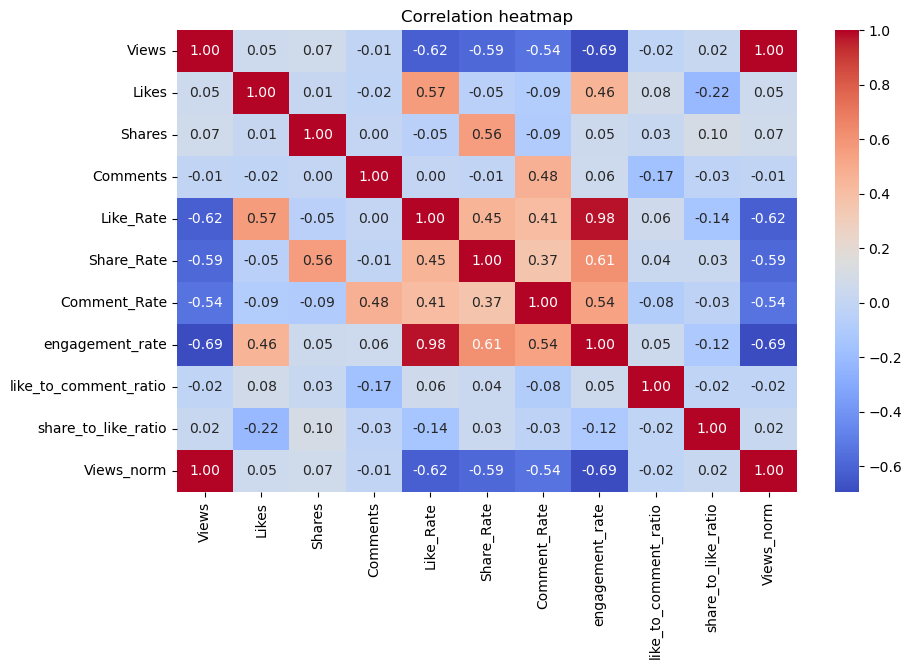

In [4]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.savefig('figures/correlation_pattern.jpg')
plt.show()

##### 3.1.1 statistical tests

In [5]:
for col in numerical_columns:
    print(f"\n--------------- {col} vs Other Metrics -----------------\n")
    for col2 in numerical_columns:
        corr, p_value = pearsonr(df[col], df[col2])
        significance = 'Correlated' if p_value < 0.05 else 'No correlation'
        print(f"{col2:10} | Correlation: {corr:.3f} | p-value: {p_value:.4f} | {significance}")



--------------- Views vs Other Metrics -----------------

Views      | Correlation: 1.000 | p-value: 0.0000 | Correlated
Likes      | Correlation: 0.054 | p-value: 0.0004 | Correlated
Shares     | Correlation: 0.068 | p-value: 0.0000 | Correlated
Comments   | Correlation: -0.007 | p-value: 0.6538 | No correlation
Like_Rate  | Correlation: -0.619 | p-value: 0.0000 | Correlated
Share_Rate | Correlation: -0.586 | p-value: 0.0000 | Correlated
Comment_Rate | Correlation: -0.542 | p-value: 0.0000 | Correlated
engagement_rate | Correlation: -0.695 | p-value: 0.0000 | Correlated
like_to_comment_ratio | Correlation: -0.018 | p-value: 0.2247 | No correlation
share_to_like_ratio | Correlation: 0.023 | p-value: 0.1316 | No correlation
Views_norm | Correlation: 0.999 | p-value: 0.0000 | Correlated

--------------- Likes vs Other Metrics -----------------

Views      | Correlation: 0.054 | p-value: 0.0004 | Correlated
Likes      | Correlation: 1.000 | p-value: 0.0000 | Correlated
Shares     | Corre

##### According to the result of heatmap Views, Likes, Shares, and Comments are essentially independent of each other.

#### 3.2 Distribution Plots

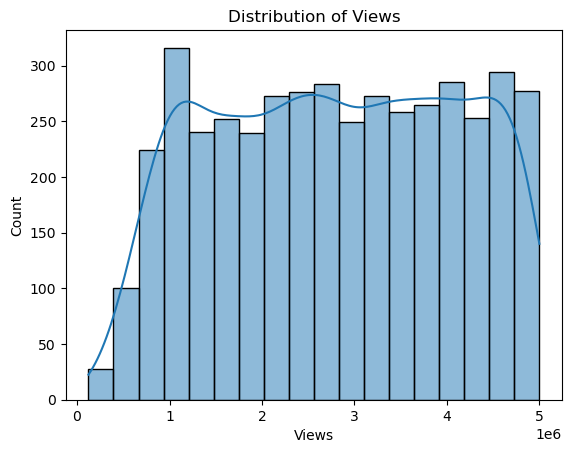

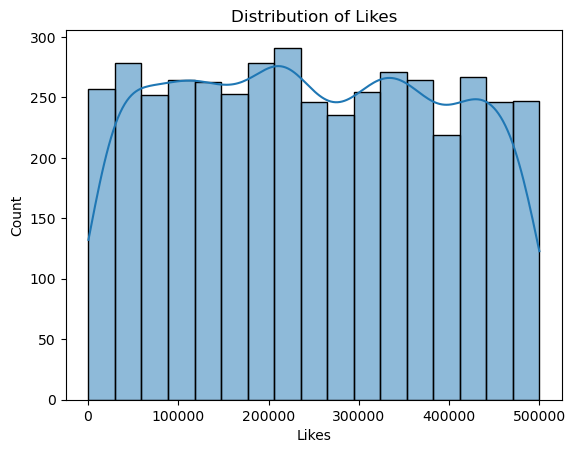

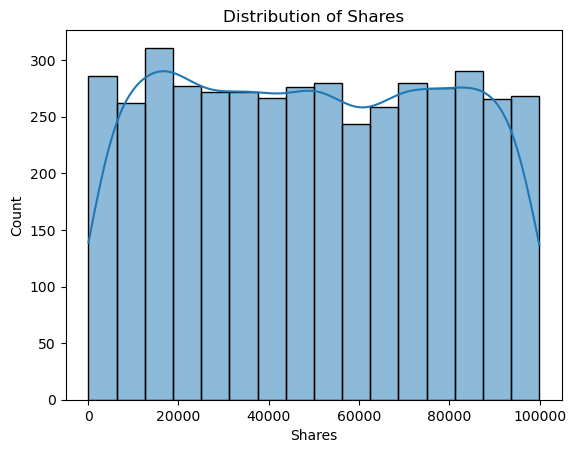

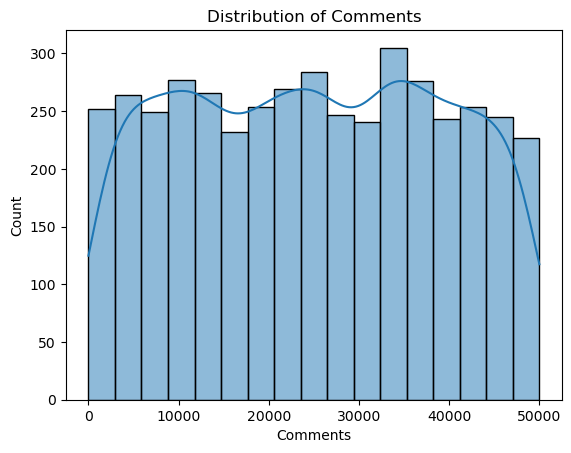

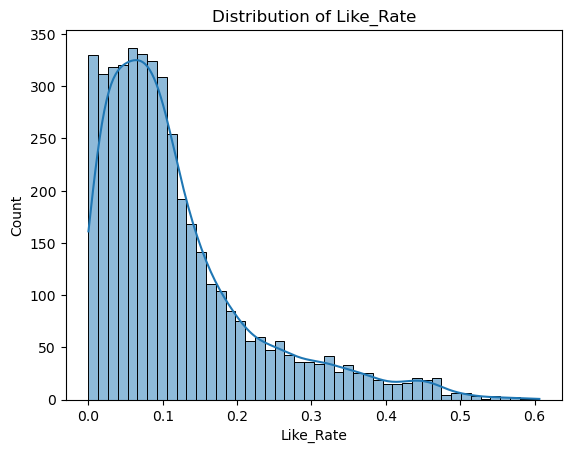

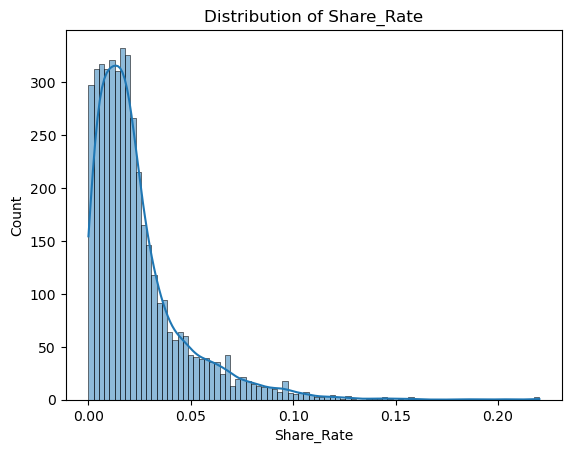

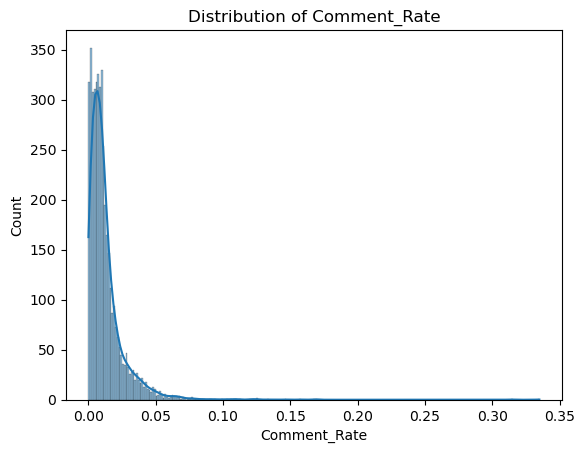

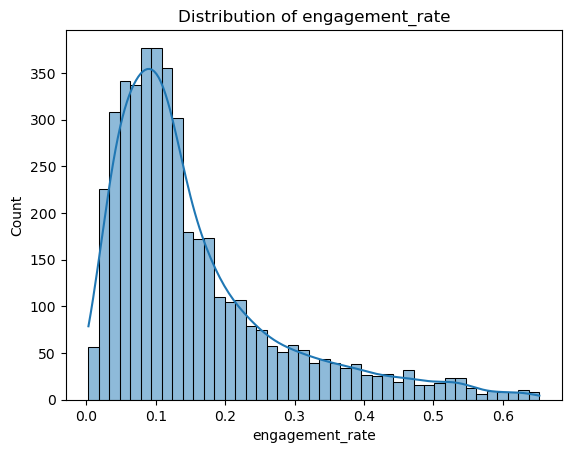

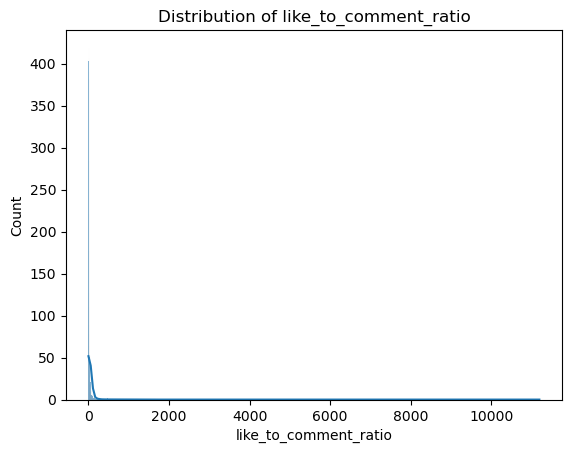

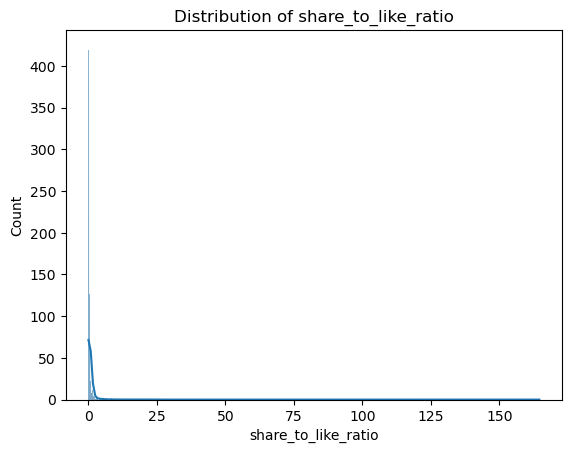

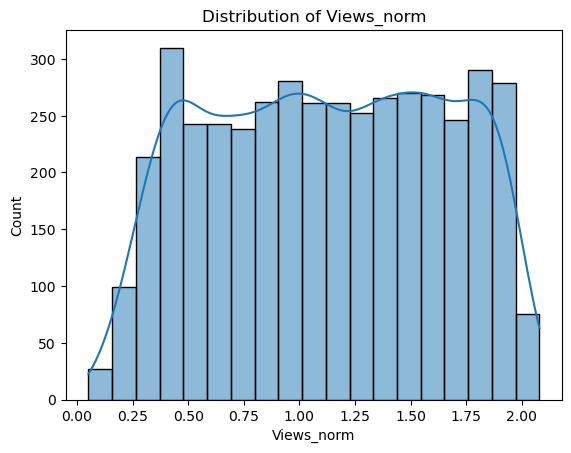

In [6]:
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f'figures/distribution_plots/distribution_of_{col}.jpg')
    plt.show()

#### 3.3 Scatter Plots

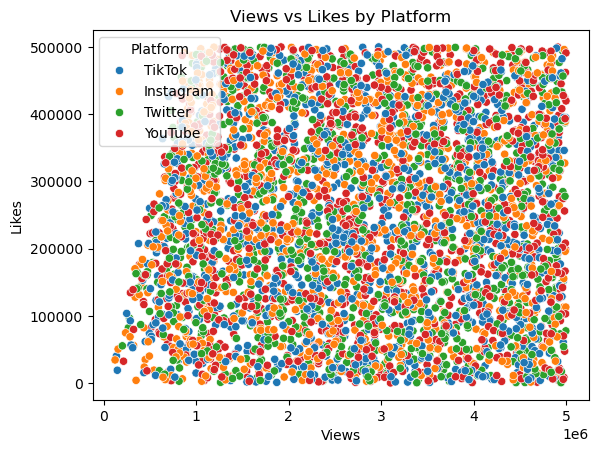

In [7]:
sns.scatterplot(x='Views', y='Likes', hue='Platform', data=df)
plt.title('Views vs Likes by Platform')
plt.savefig('figures/scatter_plots.jpg')
plt.show()

##### There is no relationship between Views and Likes — across all platforms. Most posts get views without likes. A few get both. Platform doesn’t change the story

#### 3.4 Bar Chart (Performance Across Platforms)

In [8]:
platform_avg = df.groupby('Platform')[['Views','Likes','Shares','Comments']].mean().reset_index()

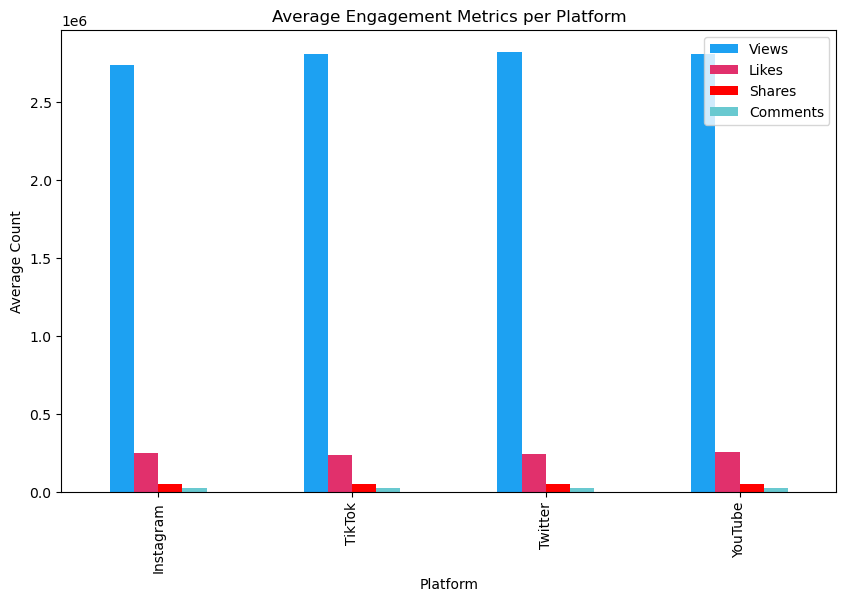

In [9]:
platform_avg.plot(x='Platform', kind='bar', figsize=(10,6), color=['#1DA1F2','#E1306C','#FF0000','#69C9D0'])
plt.title('Average Engagement Metrics per Platform')
plt.ylabel('Average Count')
plt.savefig('figures/bar_chart.jpg')
plt.show()